In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from collections import  Counter
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from sklearn.decomposition import PCA
import ipywidgets as widgets
from wordcloud import WordCloud
sns.set(color_codes=True)
from matplotlib import rcParams
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [45]:
df = pd.read_csv('After_Cleaning.csv')
df.columns

Index(['Reviews', 'Reviews_link', 'Review_rate', 'Ratings_number',
       'Reviews_number', 'Total_rate', 'Pages', 'Year_of_book',
       'Month_of_book', 'Author_followers', 'Cover', 'Genre', 'Review_day',
       'Review_month', 'Review_year', 'Num_of_names', 'Tokenized',
       'Words_amount', 'Noun', 'Adjective', 'Adverb', 'Verb', 'Other_words',
       'Updated_Review', 'Book_like', 'Positive', 'Negative', 'not_good',
       'i_love_this_book', 'i_loved_this_book', 'love_this_book',
       'loved_this_book', 'i_hate_this_book', 'one_of_the_worst_books',
       'one_of_the_best_books', 'worst_book', 'best_book', 'book', 'like',
       'love', 'make', 'read', 'story', 'time'],
      dtype='object')

# Correlations

In [3]:
df_corr=df.drop(['Reviews','Reviews_link','Tokenized'],axis=1)

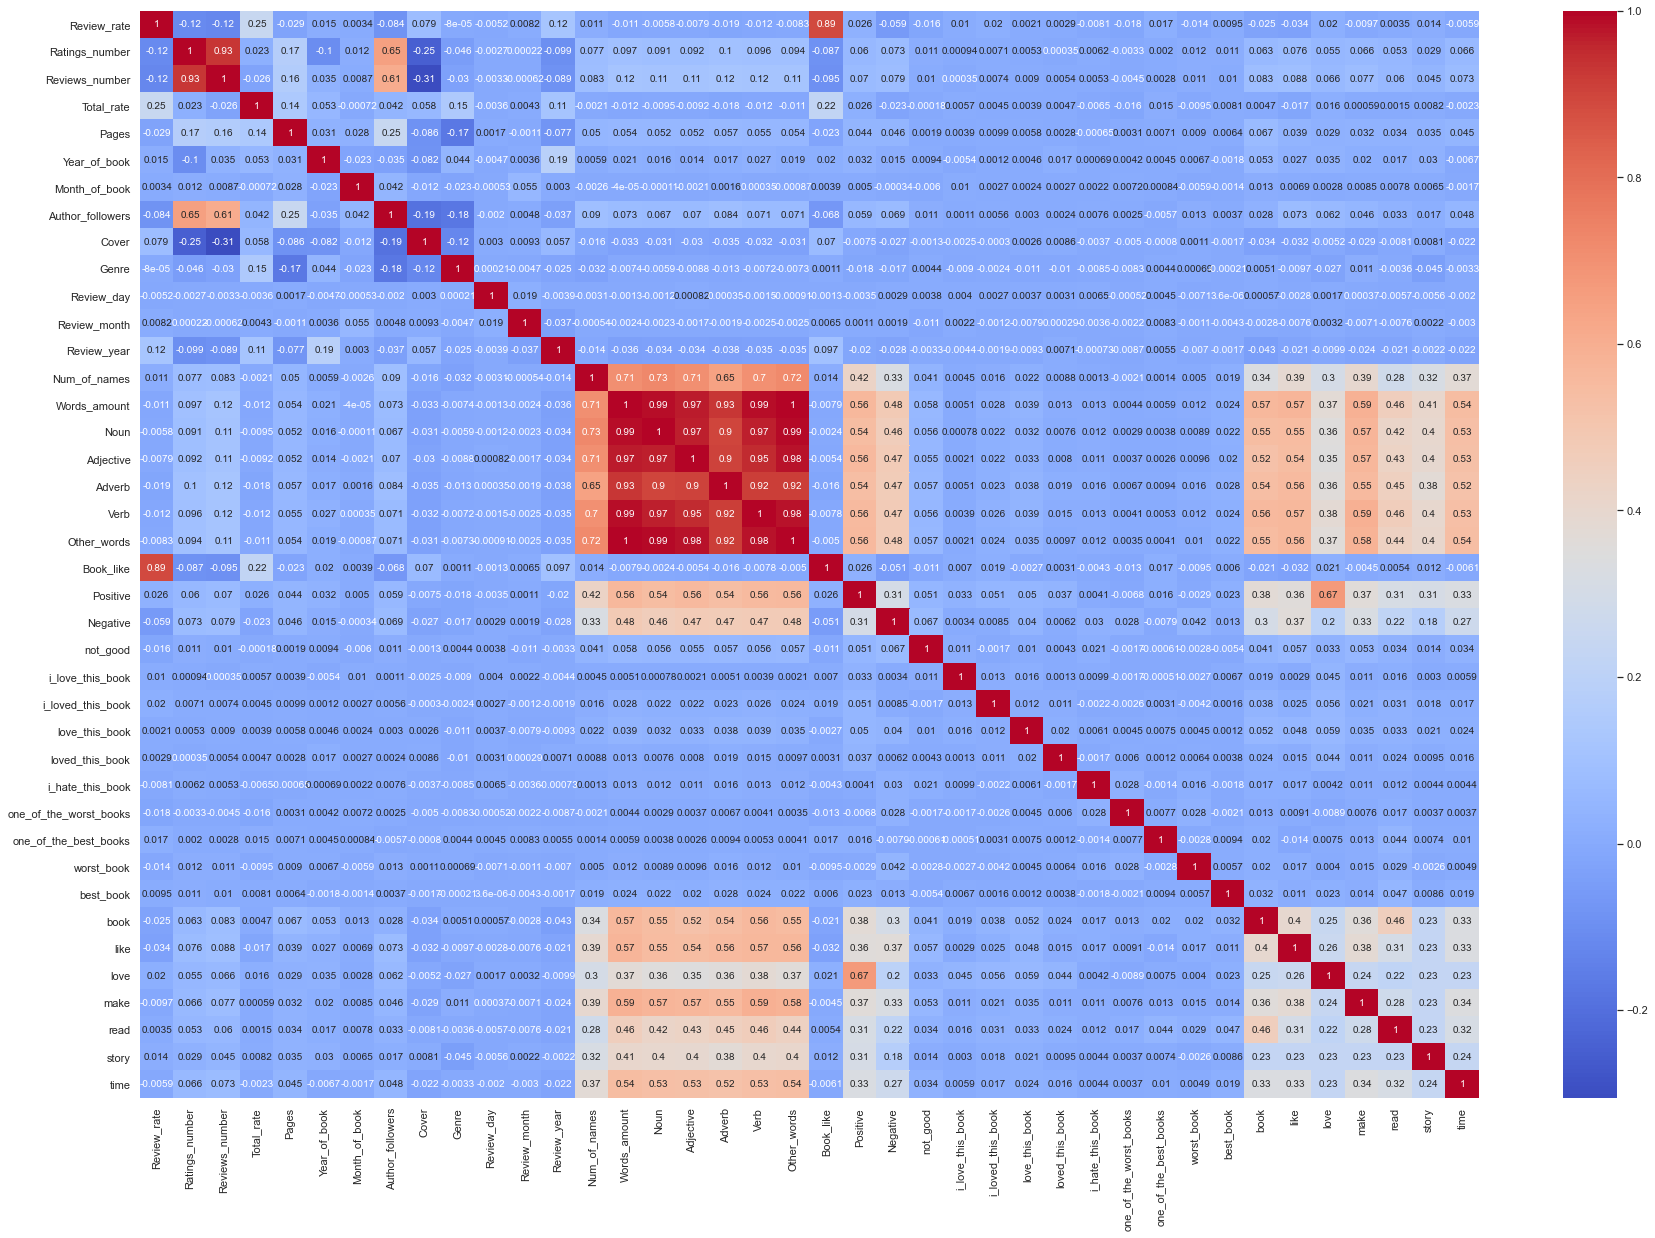

In [4]:
f, ax = plt.subplots(figsize=(30, 20))
corrMatrix = df_corr.corr('spearman') 
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

Text(0, 0.5, 'Rate')

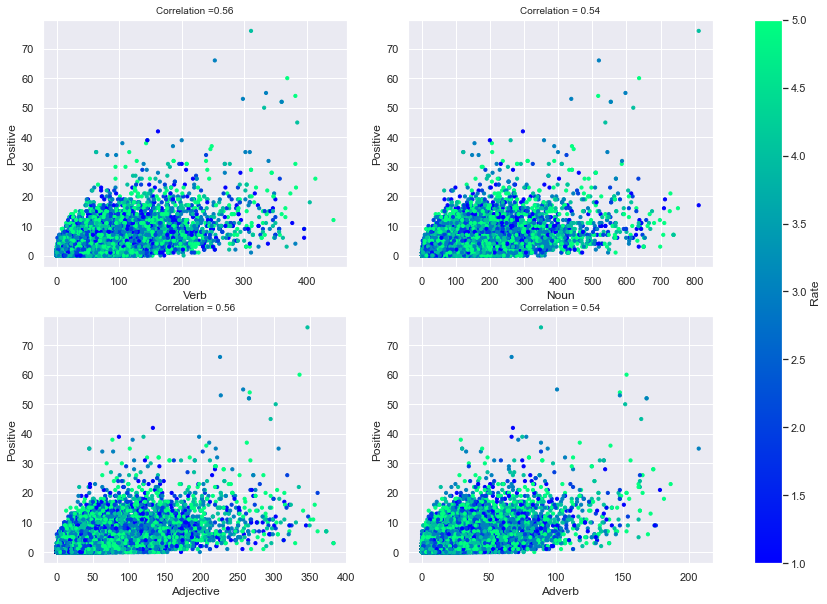

In [5]:
fig , axes = plt.subplots(2,2, figsize=(15,10))



axes[0][0].scatter(x=df['Verb'], y=df['Positive'],c = df['Review_rate'],cmap='winter',s=10)
axes[0][0].set_xlabel('Verb')
axes[0][0].set_ylabel('Positive')
axes[0][0].set_title('Correlation ='+str(df['Positive'].corr(df['Verb'],method='spearman').round(2)), size = 10)

axes[0][1].scatter(x=df['Noun'], y=df['Positive'],c = df['Review_rate'],cmap='winter',s=10)
axes[0][1].set_xlabel('Noun')
axes[0][1].set_ylabel('Positive')
axes[0][1].set_title('Correlation = '+str(df['Positive'].corr(df['Noun'],method='spearman').round(2)), size = 10)

axes[1][0].scatter(x=df['Adjective'], y=df['Positive'],c = df['Review_rate'],cmap='winter',s=10)
axes[1][0].set_xlabel('Adjective')
axes[1][0].set_ylabel('Positive')
axes[1][0].set_title('Correlation = '+str(df['Positive'].corr(df['Adjective'],method='spearman').round(2)), size = 10)

axes[1][1].scatter(x=df['Adverb'], y=df['Positive'],c = df['Review_rate'],cmap='winter',s=10)
axes[1][1].set_xlabel('Adverb')
axes[1][1].set_ylabel('Positive')
axes[1][1].set_title('Correlation = '+str(df['Positive'].corr(df['Adverb'],method='spearman').round(2)), size = 10)

cbar = plt.colorbar(plt.gca().get_children()[0], ax=axes.ravel().tolist())
cbar.ax.set_ylabel('Rate', rotation=90)

Text(0, 0.5, 'Rate')

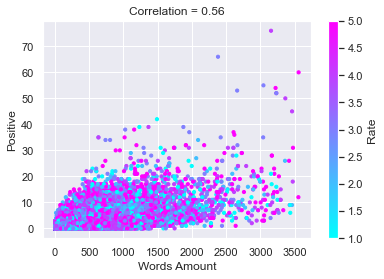

In [6]:
plt.scatter(x=df['Words_amount'], y=df['Positive'],c = df['Review_rate'],cmap='cool',s=10)
plt.xlabel('Words Amount')
plt.ylabel('Positive')
plt.title('Correlation = '+str(df['Positive'].corr(df['Words_amount'],method='spearman').round(2)), size = 12)
cbar = plt.colorbar(plt.gca().get_children()[0])
cbar.ax.set_ylabel('Rate', rotation=90)

Text(0, 0.5, 'Rate')

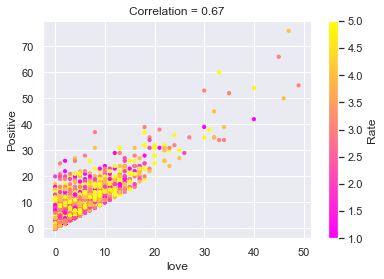

In [32]:
plt.scatter(x=df['love'], y=df['Positive'],c = df['Review_rate'],cmap='spring',s=10)
plt.xlabel('love')
plt.ylabel('Positive')
plt.title('Correlation = '+str(df['Positive'].corr(df['love'],method='spearman').round(2)), size = 12)
cbar = plt.colorbar(plt.gca().get_children()[0])
cbar.ax.set_ylabel('Rate', rotation=90)

Text(0, 0.5, 'Rate')

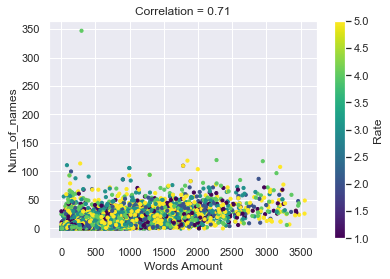

In [7]:
plt.scatter(x=df['Words_amount'], y=df['Num_of_names'],c = df['Review_rate'],cmap='viridis',s=10)
plt.xlabel('Words Amount')
plt.ylabel('Num_of_names')
plt.title('Correlation = '+str(df['Num_of_names'].corr(df['Words_amount'],method='spearman').round(2)), size = 12)
cbar = plt.colorbar(plt.gca().get_children()[0])
cbar.ax.set_ylabel('Rate', rotation=90)

<ipython-input-41-63eb573d83cd>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_corr.hist(ax = ax,bins=20,color='orange')


array([[<AxesSubplot:title={'center':'Review_rate'}>,
        <AxesSubplot:title={'center':'Ratings_number'}>,
        <AxesSubplot:title={'center':'Reviews_number'}>,
        <AxesSubplot:title={'center':'Total_rate'}>,
        <AxesSubplot:title={'center':'Pages'}>,
        <AxesSubplot:title={'center':'Year_of_book'}>],
       [<AxesSubplot:title={'center':'Month_of_book'}>,
        <AxesSubplot:title={'center':'Author_followers'}>,
        <AxesSubplot:title={'center':'Cover'}>,
        <AxesSubplot:title={'center':'Genre'}>,
        <AxesSubplot:title={'center':'Review_day'}>,
        <AxesSubplot:title={'center':'Review_month'}>],
       [<AxesSubplot:title={'center':'Review_year'}>,
        <AxesSubplot:title={'center':'Num_of_names'}>,
        <AxesSubplot:title={'center':'Words_amount'}>,
        <AxesSubplot:title={'center':'Noun'}>,
        <AxesSubplot:title={'center':'Adjective'}>,
        <AxesSubplot:title={'center':'Adverb'}>],
       [<AxesSubplot:title={'center':'Verb

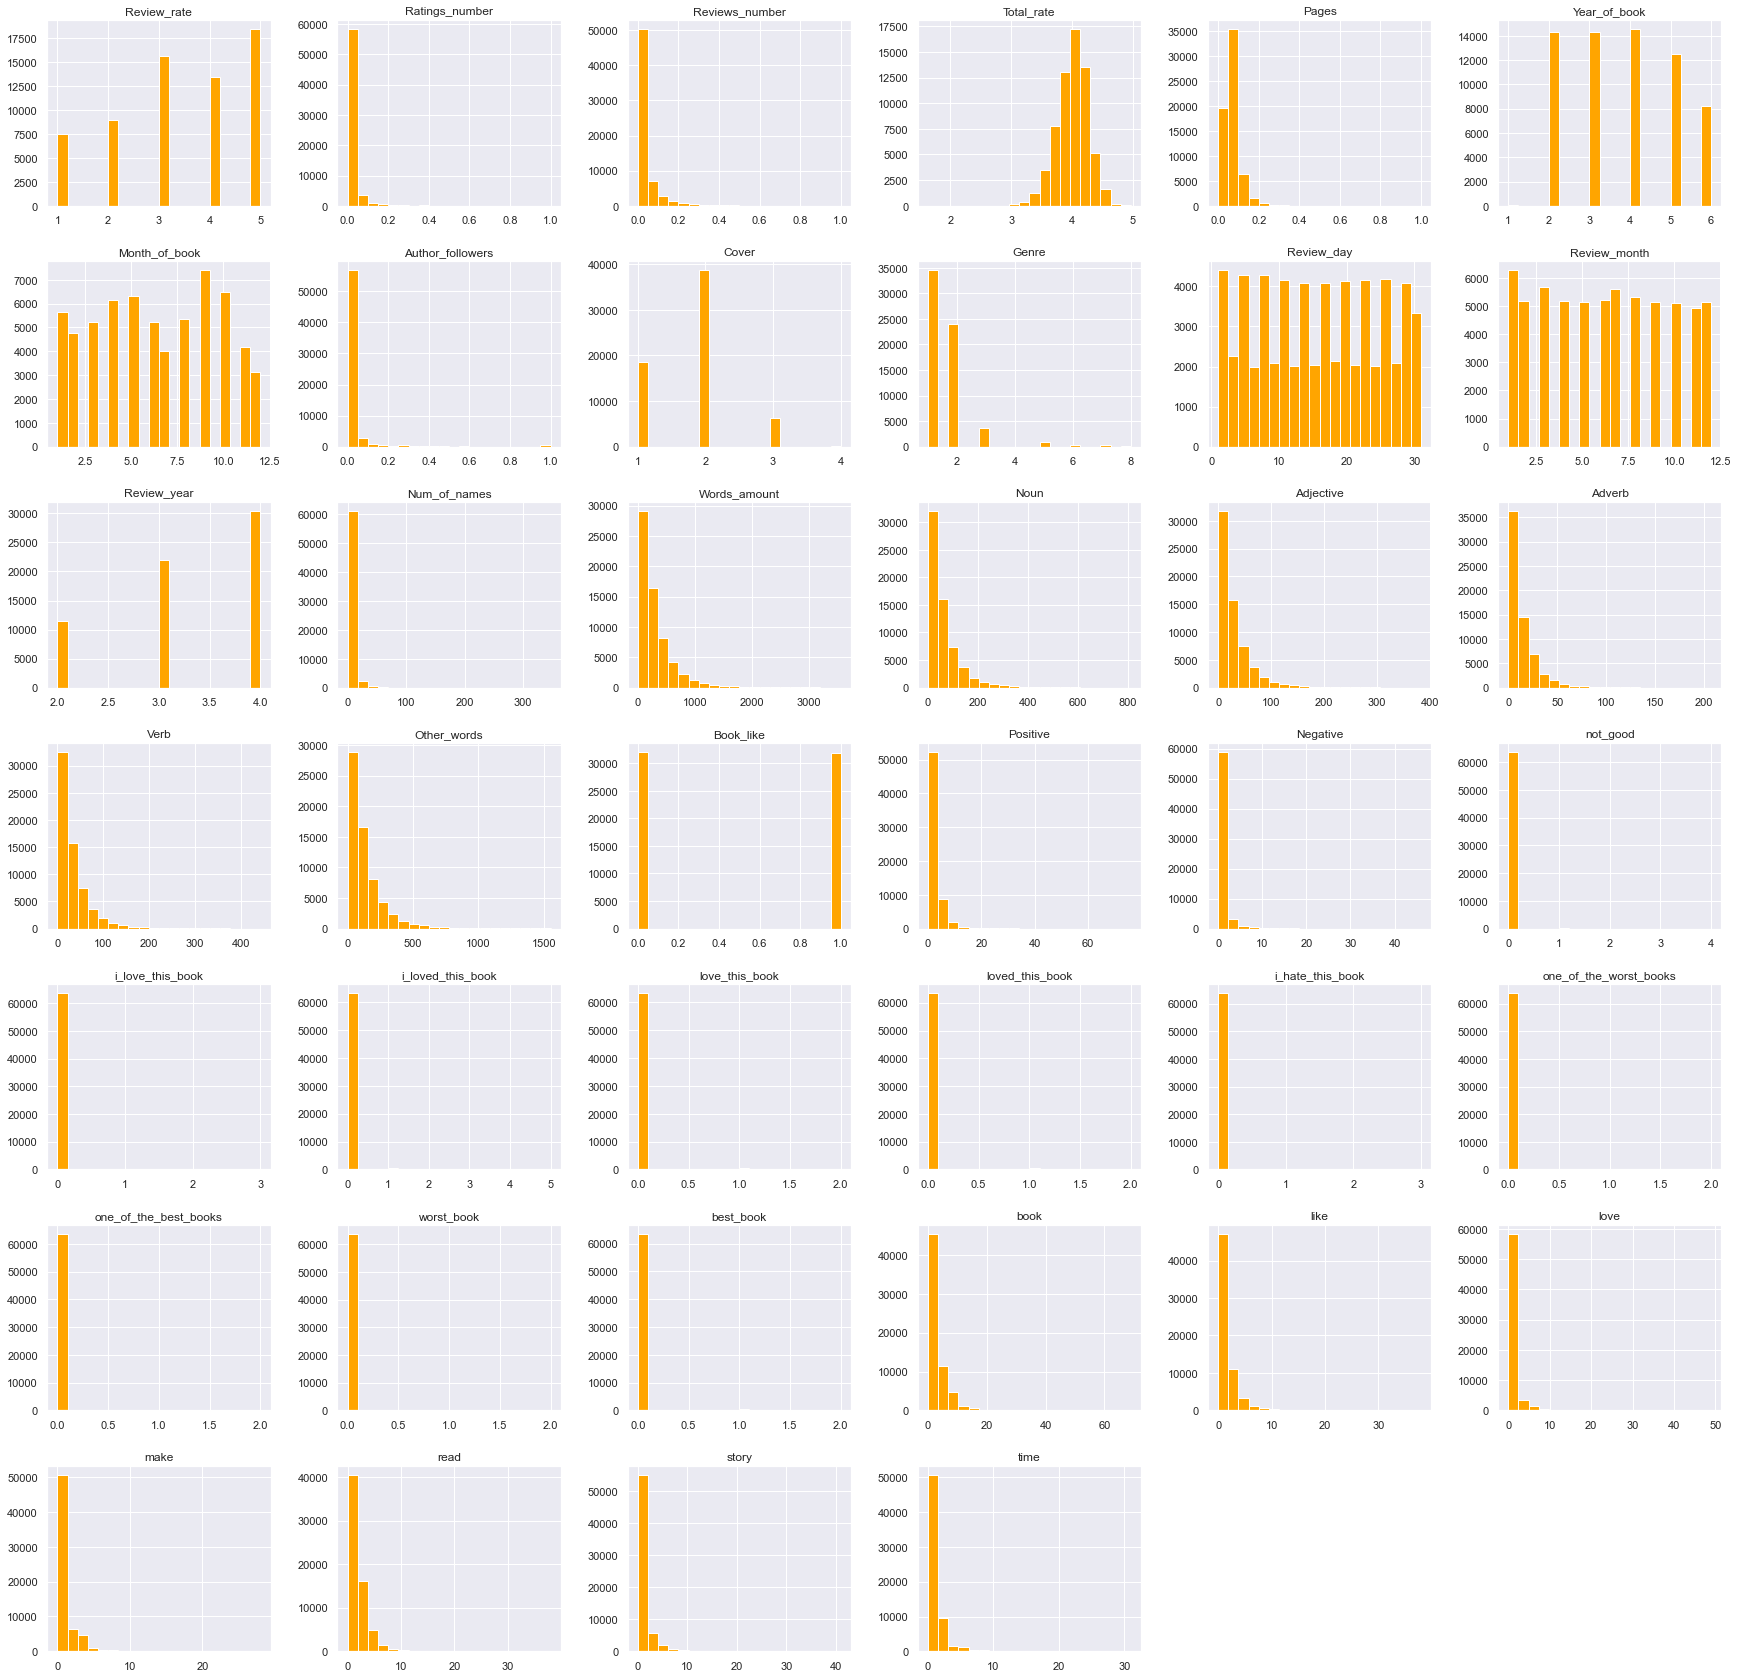

In [41]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
df_corr.hist(ax = ax,bins=20,color='orange')

# Visualization

<AxesSubplot:>

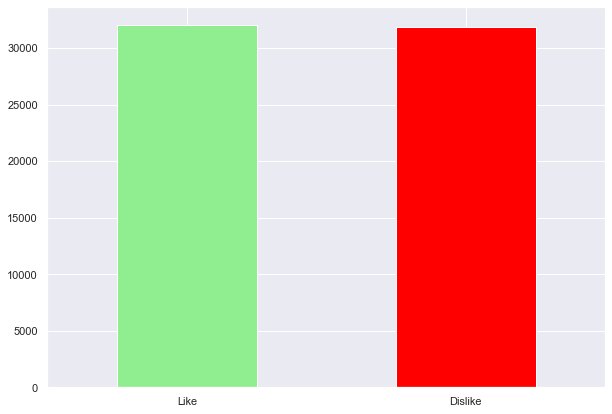

In [119]:
fig, axes = plt.subplots(1,1, figsize=(10,7))
ser = pd.Series(df['Book_like'].value_counts().values, index=['Like','Dislike'])
ser.plot(kind='bar',color = ['lightgreen','red'],rot = 0 )

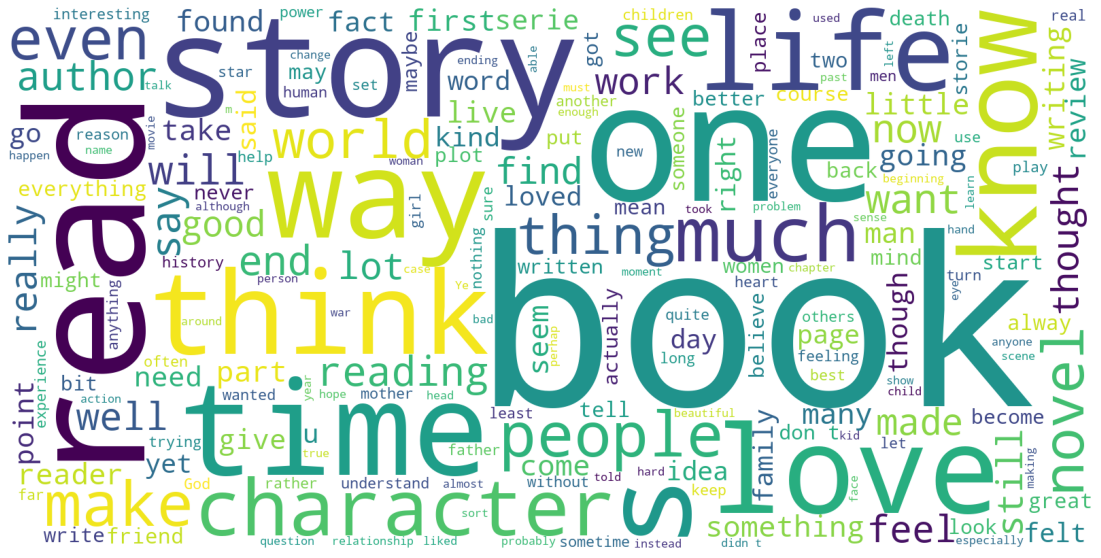

In [42]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['Reviews'].tolist()))
plt.figure( figsize=(20,10), facecolor='w')
plt.axis("off")
plt.imshow(wordcloud)

In [43]:
like_df = df[df['Book_like']==1]
dislike_df = df[df['Book_like']==0]

In [13]:
bar_df = pd.DataFrame({
    "Positive":[like_df['Positive'].mean(),dislike_df['Positive'].mean()],
    "Negative":[like_df['Negative'].mean(),dislike_df['Negative'].mean()],
    }, 
    index=["Like", "Dislike"])

<AxesSubplot:>

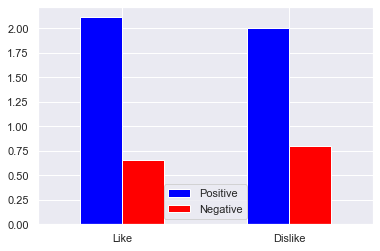

In [118]:
bar_df.plot(kind='bar',cmap='bwr',rot = 0 )

In [20]:
def get_top_ngrams(df,n=None):
    vec = CountVectorizer(stop_words='english').fit(df)
     
    bag_of_words = vec.transform(df)
     
    sum_words = bag_of_words.sum(axis=0)
     
    words_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    #words_freq = list(cv_fit.vocabulary_.items())
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
     
    return words_freq[:n]

In [18]:
common_words = get_top_ngrams(df['Reviews'],25)
df_ngram = pd.DataFrame(common_words,columns=['word','count'])
df_ngram = df_ngram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()

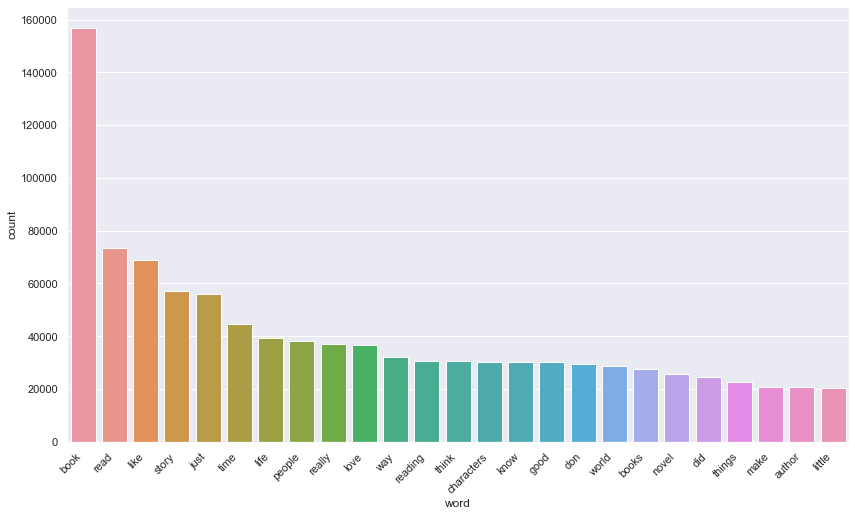

In [17]:
fig,ax = plt.subplots(figsize=(14,8))
fig = sns.barplot(x = 'word',y='count',data=df_ngram, ax=ax)
 
ax.set_xticklabels(labels=df_ngram['word'], rotation=45, ha='right')
plt.show()

In [46]:
barplot_df = pd.DataFrame({
    "Noun":[like_df['Noun'].mean(),dislike_df['Noun'].mean()],
    "Adjective":[like_df['Adjective'].mean(),dislike_df['Adjective'].mean()],
    "Adverb":[like_df['Adverb'].mean(),dislike_df['Adverb'].mean()],
    "Verb":[like_df['Verb'].mean(),dislike_df['Verb'].mean()],
    }, 
    index=["Like", "Dislike"])

<AxesSubplot:title={'center':'Lexical Categories'}>

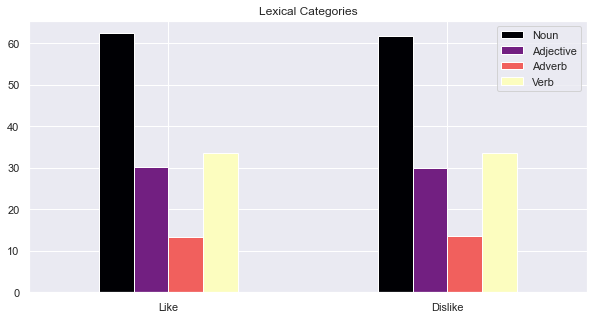

In [130]:
barplot_df.plot(kind='bar',cmap='magma',figsize=(10,5),title='Lexical Categories',rot = 0 )

In [50]:
barbook_df = pd.DataFrame({
    "Ratings_number":[like_df['Ratings_number'].median(),dislike_df['Ratings_number'].median()],
    "Reviews_number":[like_df['Reviews_number'].median(),dislike_df['Reviews_number'].median()],
    "Pages":[like_df['Pages'].median(),dislike_df['Pages'].median()],
    "Author_followers":[like_df['Author_followers'].median(),dislike_df['Author_followers'].median()],
    }, 
    index=["Like", "Dislike"])

<AxesSubplot:title={'center':'Book Information'}>

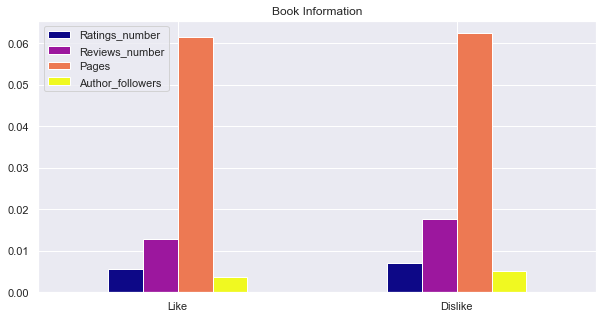

In [129]:
barbook_df.plot(kind='bar',cmap='plasma',figsize=(10,5),title='Book Information',rot=0)

In [100]:
barwords_df = pd.DataFrame({
    "i_love_this_book":[like_df['i_love_this_book'].mean(),dislike_df['i_love_this_book'].mean()],
    "i_loved_this_book":[like_df['i_loved_this_book'].mean(),dislike_df['i_loved_this_book'].mean()],
    "love_this_book":[like_df['love_this_book'].mean(),dislike_df['love_this_book'].mean()],
    "loved_this_book":[like_df['loved_this_book'].mean(),dislike_df['loved_this_book'].mean()],
    "best_book":[like_df['best_book'].mean(),dislike_df['best_book'].mean()],
    "one_of_the_best_books":[like_df['one_of_the_best_books'].mean(),dislike_df['one_of_the_best_books'].mean()],
    "worst_book":[-like_df['worst_book'].mean(),-dislike_df['worst_book'].mean()],
    "one_of_the_worst_books":[-like_df['one_of_the_worst_books'].mean(),-dislike_df['one_of_the_worst_books'].mean()],
    "i_hate_this_book":[-like_df['i_hate_this_book'].mean(),-dislike_df['i_hate_this_book'].mean()],
    "not_good":[-like_df['not_good'].mean(),-dislike_df['not_good'].mean()],

}, 
    index=["Like", "Dislike"])

<AxesSubplot:title={'center':'Good & Bad Sentences'}>

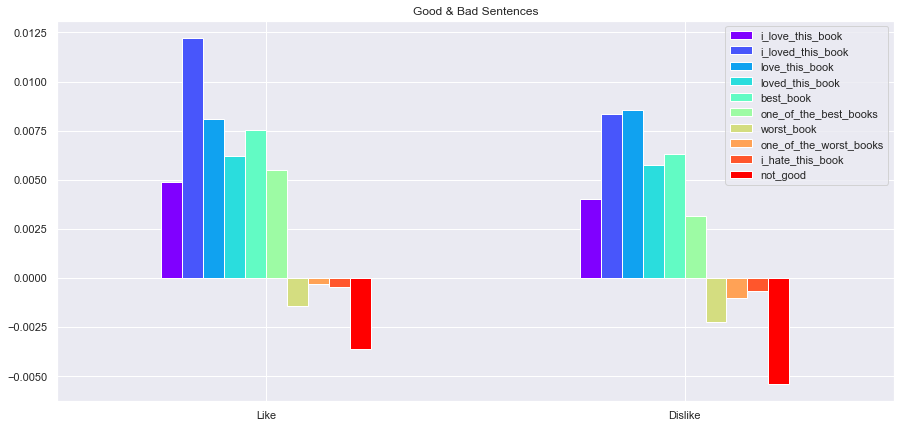

In [131]:
barwords_df.plot(kind='bar',cmap='rainbow', figsize=(15,7),title='Good & Bad Sentences',rot=0)